<a href="https://colab.research.google.com/github/ayushiiii28/Meta-Scifor/blob/main/MLProjectTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Titanic Project
# Problem Statement:
# The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early
# 1912. It gives you information about multiple people like their ages, sexes, sibling
# counts, embarkment points, and whether or not they survived the disaster. Based on
# these features, you have to predict if an arbitrary passenger on Titanic would survive the
# sinking or not.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
titanic_data = pd.read_csv('/titanic_train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)


titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

titanic_data.drop('Cabin', axis=1, inplace=True)

titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'], drop_first=True)

titanic_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

print(titanic_data.head())

   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0         0       3  22.0      1      0   7.2500      True       False   
1         1       1  38.0      1      0  71.2833     False       False   
2         1       3  26.0      0      0   7.9250     False       False   
3         1       1  35.0      1      0  53.1000     False       False   
4         0       3  35.0      0      0   8.0500      True       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


In [26]:
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
from sklearn.model_selection import train_test_split

X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-30-782535a4c10e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=titanic_data, x='Survived', palette='pastel')


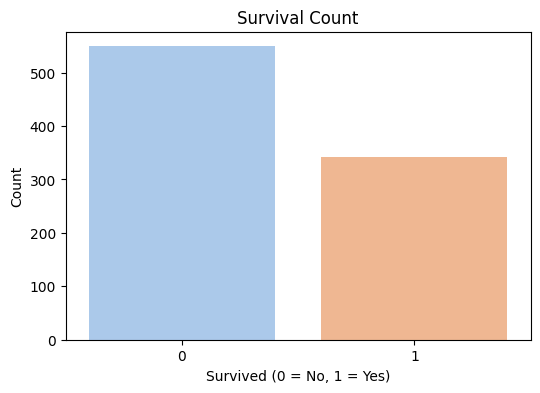

Survival Rate: 38.38%


In [30]:
plt.figure(figsize=(6, 4))
sns.countplot(data=titanic_data, x='Survived', palette='pastel')
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

survival_rate = titanic_data['Survived'].mean()
print(f'Survival Rate: {survival_rate:.2%}')

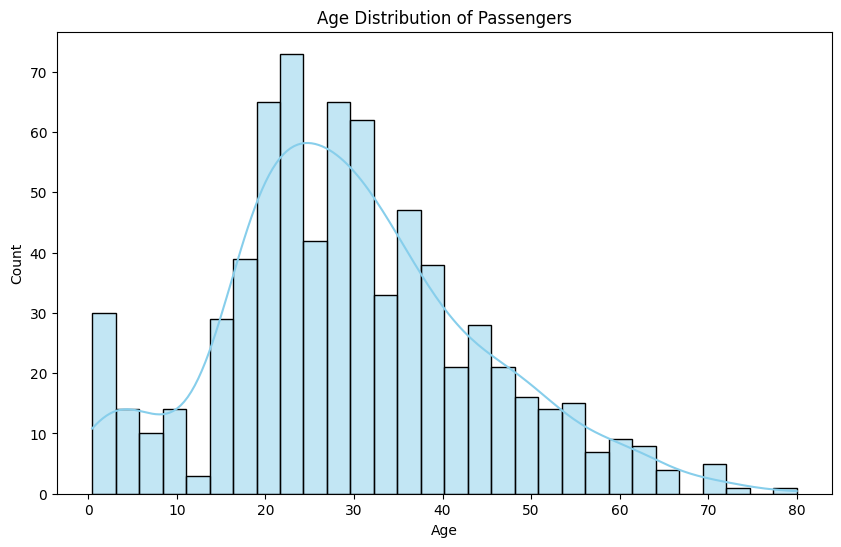

In [31]:
# Plot the age distribution
plt.figure(figsize=(10, 6))
sns.histplot(titanic_data['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

<ipython-input-32-709d94123da2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=titanic_data, x='Pclass', palette='pastel')


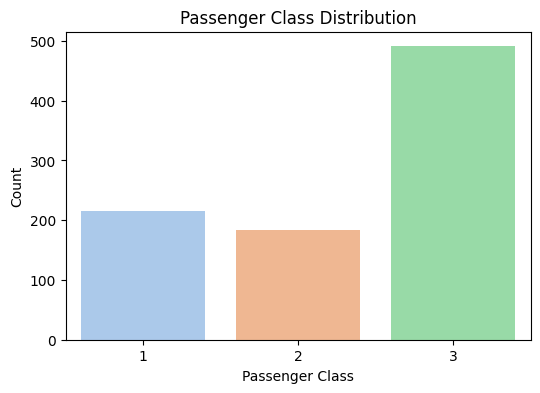

In [32]:
# Plot the class distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=titanic_data, x='Pclass', palette='pastel')
plt.title('Passenger Class Distribution')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

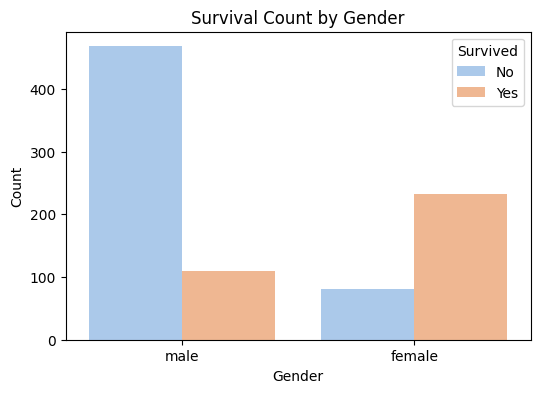

In [33]:
plt.figure(figsize=(6, 4))
sns.countplot(data=titanic_data, x='Sex', hue='Survived', palette='pastel')
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()


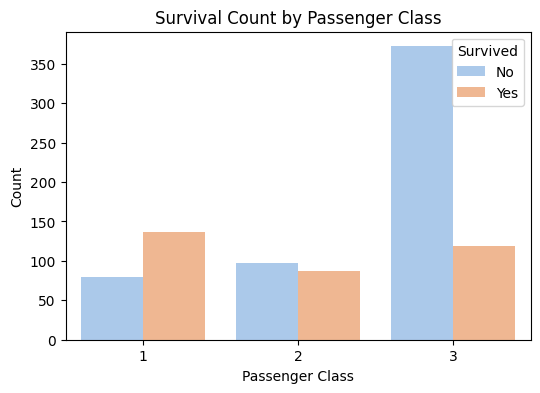

In [34]:
plt.figure(figsize=(6, 4))
sns.countplot(data=titanic_data, x='Pclass', hue='Survived', palette='pastel')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()


<ipython-input-35-a1a196ef7b96>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=titanic_data, x='Survived', y='Age', palette='pastel')


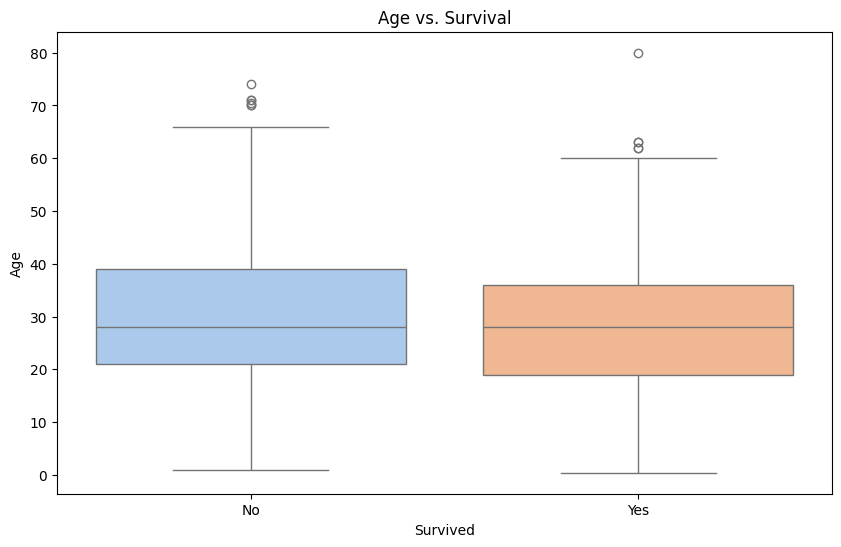

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=titanic_data, x='Survived', y='Age', palette='pastel')
plt.title('Age vs. Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [62]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[90 15]
 [18 56]]


In [49]:
def predict_survival(model, scaler, passenger_data):
    passenger_df = pd.DataFrame([passenger_data])
    passenger_df['Age'].fillna(passenger_df['Age'].median(), inplace=True)
    passenger_df['Sex'] = passenger_df['Sex'].map({'male': 0, 'female': 1})

    if 'Embarked' in passenger_df.columns:
        passenger_df = pd.get_dummies(passenger_df, columns=['Embarked'], drop_first=True)

    passenger_df = passenger_df.reindex(columns=X.columns, fill_value=0)
    passenger_df_scaled = scaler.transform(passenger_df)

    prediction = model.predict(passenger_df_scaled)
    return prediction[0]  # Return 1 for survived, 0 for not survived

# Example of passenger data
new_passenger = {
    'Pclass': 1,      # Ticket class
    'Sex': 'female',  # Gender
    'Age': 29,        # Age
    'SibSp': 0,       # Number of siblings/spouses aboard
    'Parch': 0,       # Number of parents/children aboard
    'Fare': 211.3375, # Fare
    'Embarked': 'C'   # Port of Embarkation
}

# Make prediction for the new passenger
survival_prediction = predict_survival(model, scaler, new_passenger)

if survival_prediction == 1:
    print("The passenger would survive.")
else:
    print("The passenger would not survive.")

The passenger would survive.


In [21]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_rf_pred))
print(classification_report(y_test, y_rf_pred))

Random Forest Accuracy: 0.8212290502793296
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [63]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("-" * 40)

Model: Logistic Regression
Accuracy: 0.8100558659217877
[[90 15]
 [19 55]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

----------------------------------------
Model: Decision Tree
Accuracy: 0.7877094972067039
[[86 19]
 [19 55]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       105
           1       0.74      0.74      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

----------------------------------------
Model: Random Forest
Accuracy: 0.8156424581005587
[[90 15]
 [18 56]]
              precision    recall  f1-score   suppo